# **Set Up:**
Source: Udemy - Python for Data Science and Machine Learning Bootcamp, instructed by Jose Portilla

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
#Get data from csv file:
loan = pd.read_csv('/content/drive/My Drive/pydata/loan_data.csv')

In [10]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The 'Purpose' column as categorical, which means we need to transform them using dummy variables so sklearn will be able to understand them. We will deal with this when we setting the data up for algorithm.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# **Data Analysis:**

Text(0.5, 0, 'FICO')

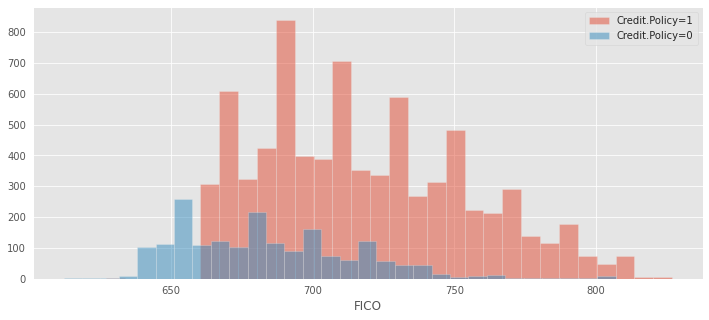

In [38]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5, bins=30,label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5, bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Finding: 
1. There are more people in the dataset that have Credit policy = 1 (means they met the credit underwriting criteria of Lending Club)
2. People with lower FICO score has the tendency of not meeting credit underwriting criteria of Lending Club
3. People with FICO score less than 660 are all not meeting Lending Club criteria

Text(0.5, 0, 'FICO')

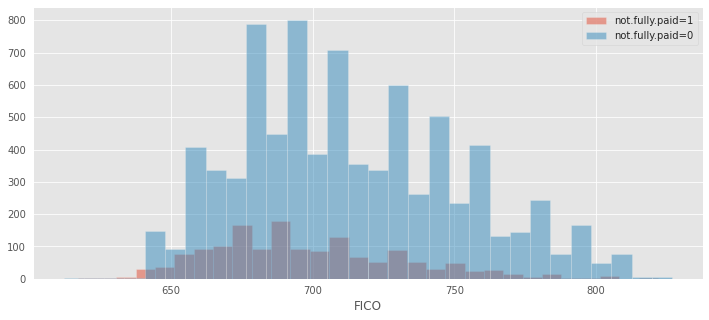

In [44]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5, bins=30,label='not.fully.paid=1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5, bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Finding:
1. Majority of people from the dataset is fully paying their debt
2. The pattern of not fully paid and fully paid are almost identical for each FICO score
3. All people with FICO score lower than 630 are not paying their debt

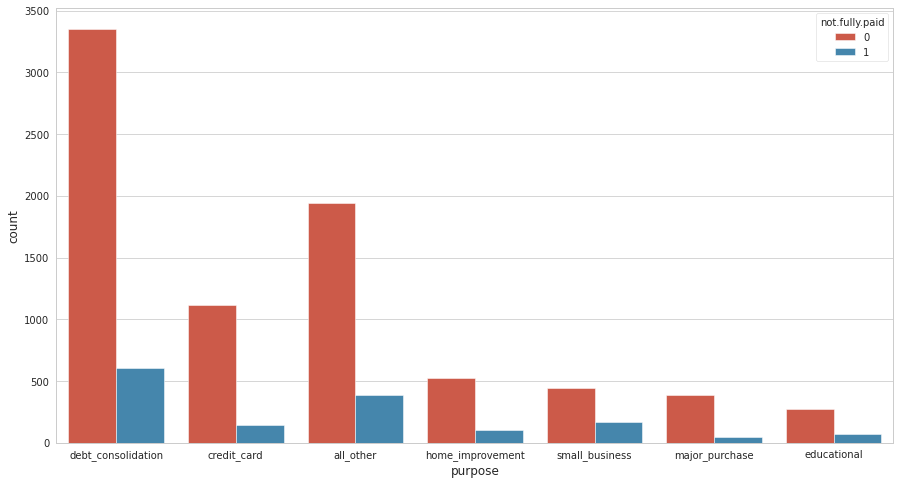

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.countplot(x='purpose', data=loan,hue='not.fully.paid')

Finding:
1. The most not fully paid category is people borrow for debt consolidation. It is also the most reason people borrow from Lending Club
2. The second most common reason for people to borrow from Lending Club is all_other and the third is credit card
3. The 2 least not fully paid are major purchase and educational. These 2 are alos the least reasons people borrow from Lending Club
4. The ratio between fully paid and not fully paid are almost the same for each reasons of borrowing

Checking the trend between FICO score and interest rate:

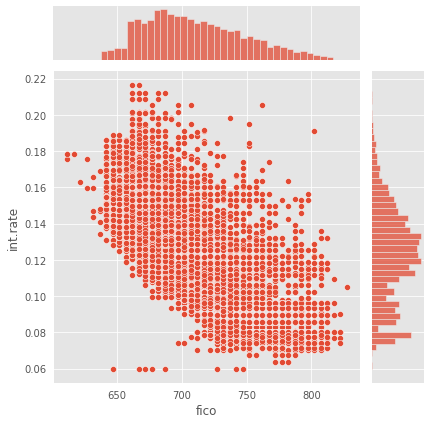

In [40]:
sns.jointplot(x='fico',y='int.rate',data=loan)

Finding: Interest rate is correlate with FICO score, which make sense as better FICO score will lead to lower interest rate

Let's breakdown the graphs into Not Fully Paid vs. Fully Paid, and meeting policy or not, to see how the default rate changed with all these factor:

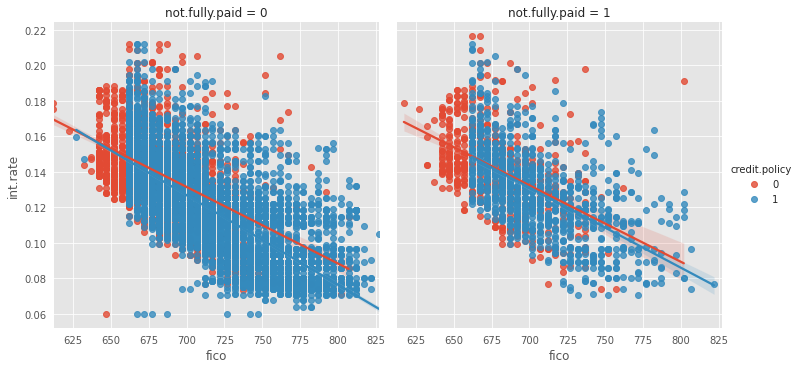

In [48]:
sns.lmplot(x='fico',y='int.rate',data=loan,hue='credit.policy',col='not.fully.paid')

Finding: The trend of paying their debt or not is almost the same for fico score and also whether the person met the criteria.

# **Categorical Features:**

In [50]:
cat_feats=['purpose']

In [51]:
final_data = pd.get_dummies(loan,columns=cat_feats,drop_first=True)

In [52]:
#Check data if the dummies get created:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# **Train Test Split:**

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# **Decision Tree Model:**

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Predictions and Evaluation**


In [59]:
prediction = dtree.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [63]:
print(confusion_matrix(y_test,prediction))

[[1993  438]
 [ 338  105]]


# **Random Forest Model:**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rtc = RandomForestClassifier(n_estimators=600)

In [66]:
rtc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Predictions and Evaluation**

In [67]:
rtc_predict=rtc.predict(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,rtc_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.74      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [71]:
print(confusion_matrix(y_test,rtc_predict))

[[2425    6]
 [ 433   10]]


**Conclusion:**
1. Precision on Random Forest is better than Decision Tree
2. Recall on Class 1 is better on Decision Tree compared with Random Forest on the same class. Same situation happened on f1 Score on Class 1
3. Overall Random Forest gave us a better results. However, neither model did very well and hence we would need more feature engineering, such as domain knowledge and experiences